# Feature Selection

 - There are several benefits of feature selection
 - Some are given below:
     - Reduces overfitting: Less redundant data means less opportunity to make decisions based on noise.
     - Improves Accuracy: Less misleading data means modeling accuracy improves.
     - Reduces Training Time: Less data means that algorithms train faster.
 - In this notebook, we discuss several feature selection algorithms
     - Algorithm 1: Dropping Constant Features using Variance Threshold Technique
     - Algorithm 2: Feature Selection using Pearson's correlation

# Algorithm 1 - Dropping Constant Features using Variance Threshold Technique

In [1]:
import pandas as pd
# Make a dataframe for the following data

data = pd.DataFrame({"A":[1,2,4,1,2,4],
                     "B":[4,5,6,7,8,9],
                     "C":[0,0,0,0,0,0],
                     "D":[1,1,1,1,1,1]}
                    )
data

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


# Variance Threshold:

 - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
 - class sklearn.feature_selection.VarianceThreshold(threshold=0.0)
 - Feature selector that removes all low-variance features.
 - This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [2]:
from sklearn.feature_selection import VarianceThreshold
# By default, the threshold = 0 i.e. it will remove the zero-variance threshold
var_thresh = VarianceThreshold() # by default the threshold = 0
var_thresh.fit(data)

VarianceThreshold()

In [3]:
var_thresh.get_support()

array([ True,  True, False, False])

In [4]:
print("All features: ", data.columns)
print("Features Selected: ", data.columns[var_thresh.get_support()])

All features:  Index(['A', 'B', 'C', 'D'], dtype='object')
Features Selected:  Index(['A', 'B'], dtype='object')


In [5]:
# the following code drops the columns based on the variance threshold algorithm
selected_columns = data.columns[var_thresh.get_support()]
for cols in data.columns:
    if cols not in selected_columns:
        data.drop(columns = cols, inplace = True)

In [6]:
data

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


# Algorithm 2 - Feature Selection with Pearson's correlation

# Idea

 - Highly correlated features with the target variable are important features 
 - High correlation between features, (say over 90% or over 80%) indicate the existence of duplicate features.
 - In case of duplicate features, we do not need to take all the features but one one of them would suffice

In [7]:
## Let's load the Absenteeism dataset

df = pd.read_excel('absenteeism.xls')
print(df.shape)
df.head()

(740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [8]:
df.dropna(inplace = True)
print(df.shape)

(639, 21)


In [9]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [10]:
# Separate the independent (X) and dependent (y) features
y = df['Absenteeism time in hours']
X = df.drop(columns = 'Absenteeism time in hours')


In [11]:
X.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0


In [12]:
y.head()

0    4.0
1    0.0
2    2.0
3    4.0
4    2.0
Name: Absenteeism time in hours, dtype: float64

In [13]:
# Let's first drop the feature id as it is a personal identifier
# Let's split the data into train and test set
# Note that correlation will be done only on the training dataset
from sklearn.model_selection import train_test_split
X.drop(columns = "ID", inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [14]:
# let's import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
Reason for absence,1.000000,-0.082365,0.139880,-0.141645,-0.108721,0.187522,0.099970,-0.044458,-0.141390,0.032852,-0.509388,-0.050810,-0.056189,0.121760,-0.079242,-0.066426,0.010671,-0.090484,0.053957
Month of absence,-0.082365,1.000000,-0.042561,0.394502,0.126988,-0.039480,-0.066917,0.009941,-0.110607,-0.474779,0.111391,-0.025659,0.049621,0.005340,-0.028218,0.042912,0.024668,-0.065343,0.048347
Day of the week,0.139880,-0.042561,1.000000,0.048180,0.010392,0.096749,0.021794,0.013481,0.041432,0.012381,-0.037094,0.082978,0.091858,0.027641,0.040792,-0.029048,-0.145997,-0.064513,-0.128202
Seasons,-0.141645,0.394502,0.048180,1.000000,0.049554,-0.065337,-0.013556,-0.014083,0.142321,-0.063809,0.126736,0.032900,0.000724,-0.080454,-0.020047,0.012827,-0.010173,-0.048552,0.011707
Transportation expense,-0.108721,0.126988,0.010392,0.049554,1.000000,0.224753,-0.347612,-0.202000,0.053691,-0.079950,0.111324,-0.057344,0.369093,0.117376,0.045165,0.338960,-0.209951,-0.186753,-0.141915
Distance from Residence to Work,0.187522,-0.039480,0.096749,-0.065337,0.224753,1.000000,0.162415,-0.127041,-0.024887,-0.016185,-0.042408,-0.251078,0.040158,0.458648,-0.080751,0.190246,-0.029693,-0.350742,0.129575
Service time,0.099970,-0.066917,0.021794,-0.013556,-0.347612,0.162415,1.000000,0.652352,0.003865,-0.021079,-0.012317,-0.257400,-0.055222,0.385568,0.099249,-0.455354,0.465684,-0.064983,0.512653
Age,-0.044458,0.009941,0.013481,-0.014083,-0.202000,-0.127041,0.652352,1.000000,-0.051574,-0.048063,0.088810,-0.250159,0.052568,0.231321,0.137464,-0.227388,0.418176,-0.066631,0.470392
Work load Average/day,-0.141390,-0.110607,0.041432,0.142321,0.053691,-0.024887,0.003865,-0.051574,1.000000,-0.104236,0.031562,-0.079139,0.025612,-0.033912,0.040739,0.028977,-0.024456,0.065756,-0.060561
Hit target,0.032852,-0.474779,0.012381,-0.063809,-0.079950,-0.016185,-0.021079,-0.048063,-0.104236,1.000000,-0.128949,0.123075,-0.019617,-0.077325,0.064472,-0.011375,-0.059414,0.115097,-0.109362


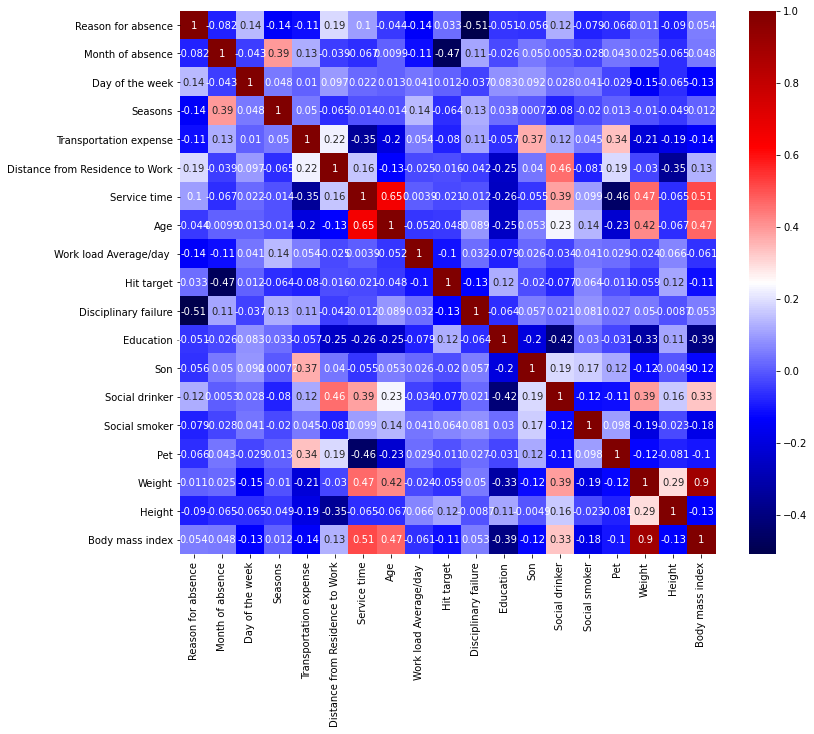

In [16]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

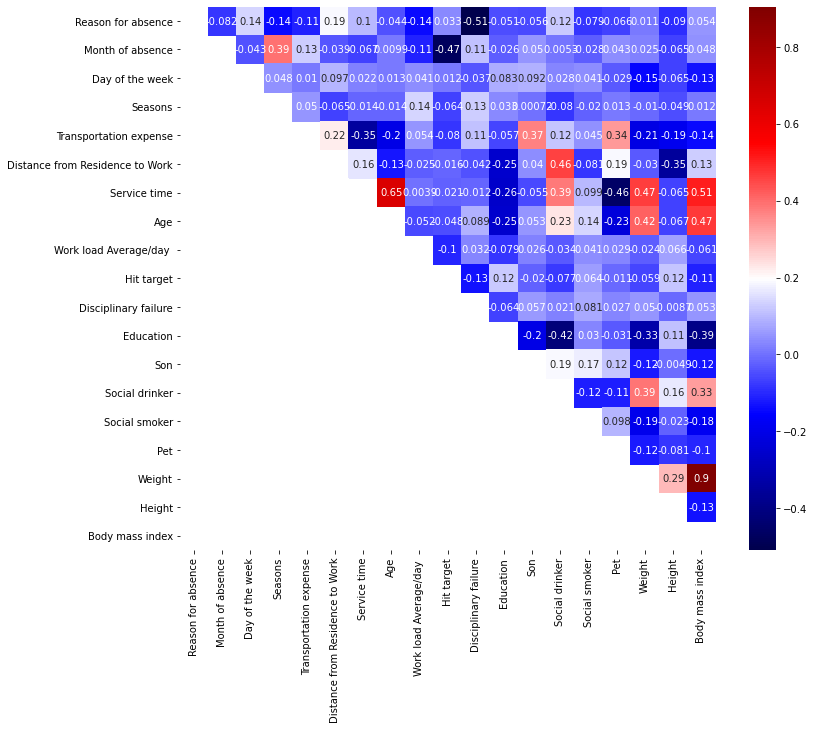

In [17]:
# use of the mask 
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2);

In [18]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(X_train, 0.9) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

1
{'Body mass index'}
